<a href="https://colab.research.google.com/github/RachitBhatt92/Deep_Learning/blob/master/test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as pro

In [0]:
data=pd.read_csv(r'/content/musk_csv.csv')
data.head()

ID molecule_name conformation_name  f1   f2  ...  f163  f164  f165  f166  class
0   1      MUSK-211           211_1+1  46 -108  ...   156   -50  -112    96      1
1   2      MUSK-211          211_1+10  41 -188  ...   169   -61  -136    79      1
2   3      MUSK-211          211_1+11  46 -194  ...   165   -67  -145    39      1
3   4      MUSK-211          211_1+12  41 -188  ...   168   -60  -135    80      1
4   5      MUSK-211          211_1+13  41 -188  ...   168   -60  -135    80      1

[5 rows x 170 columns]

Checking for class imbalance:-


In [0]:
data['class'].value_counts()

0    5581
1    1017
Name: class, dtype: int64

### **EDA and Preprocessing:-**


In [0]:
data.shape

(6598, 170)

In [0]:
pro.ProfileReport(data)

/usr/local/lib/python3.6/dist-packages/pandas_profiling/describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Pandas profiling is a great tool to analyse corelation,cardinality,missing values etc etc




In [0]:
data.isnull().any().sum()

0

This shows that our data has no missing values


In [0]:
%matplotlib inline

In [0]:
data.nunique().sort_values()


class                   2
molecule_name         102
f76                   113
f5                    129
f147                  144
                     ... 
f34                   419
f73                   429
f127                  435
conformation_name    6598
ID                   6598
Length: 170, dtype: int64

so its quite evident that features '**conformation_name**' and '**ID**' have highest cardinality so must be dropped

In [0]:
data.drop(['conformation_name','ID','molecule_name'],axis=1,inplace=True)

In [0]:
data.describe([0.1,0.5,0.99,1]).T

count        mean        std    min    10%    50%     99%   100%    max
f1     6598.0   58.945135  53.249007  -31.0   33.0   44.0  291.00  292.0  292.0
f2     6598.0 -119.128524  90.813375 -199.0 -198.0 -149.0   88.00   95.0   95.0
f3     6598.0  -73.146560  67.956235 -167.0 -146.0  -99.0   49.00   81.0   81.0
f4     6598.0   -0.628372  80.444617 -114.0  -80.0  -25.0  152.00  161.0  161.0
f5     6598.0 -103.533495  64.387559 -118.0 -117.0 -117.0  277.00  325.0  325.0
...       ...         ...        ...    ...    ...    ...     ...    ...    ...
f163   6598.0  201.760230  59.526751   73.0  148.0  191.0  439.06  625.0  625.0
f164   6598.0  -47.488330  55.069365 -289.0  -72.0  -60.0  244.09  295.0  295.0
f165   6598.0 -150.259927  76.019023 -428.0 -242.0 -150.0  138.00  168.0  168.0
f166   6598.0   41.770233  94.116085 -471.0  -22.0   27.0  229.00  367.0  367.0
class  6598.0    0.154138   0.361108    0.0    0.0    0.0    1.00    1.0    1.0

[167 rows x 9 columns]

Model Building:-


In [0]:
from sklearn.model_selection import train_test_split

In [0]:
train_X,test_X,train_y,test_y=train_test_split(data[data.columns.difference(['class'])],data['class'],test_size=0.2,random_state=123)

In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
ss=StandardScaler()

In [0]:
train_X=ss.fit_transform(train_X)
test_X=ss.transform(test_X)

In [0]:
from keras.models import Sequential
from keras.layers import *

Using hyperparameter tuning to find best parameters for our Neural Networks:


In [0]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

In [0]:
def try_and_error(layers, activation):
    model = Sequential()
    for i, nodes in enumerate(layers):
        if i==0:
            model.add(Dense(nodes,input_dim=train_X.shape[1]))#input layers for 1st time
            model.add(Activation(activation)) #Activation layer
        else:
            model.add(Dense(nodes))# Hidden Layers
            model.add(Activation(activation))#Activation Layers
    model.add(Dense(1)) # output layer
    
    model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
    return model
    

In [0]:
#layers=[[500], [500,300], [500,300,100]]
#param_grid = {'layers':layers, 'activation':['sigmoid', 'relu','leaky_relu'], 'batch_size' : [50,100,150]}
#grid = GridSearchCV(estimator=KerasClassifier( build_fn=try_and_error,epochs=100, verbose=0), param_grid=param_grid,cv=10)

In [0]:
#m
grid_result = grid.fit(train_X,train_y)

In [0]:
#[grid_result.best_score_,grid_result.best_params_]

In [0]:
from keras import optimizers


In [0]:
#Building our model:-
ann=Sequential()
ann.add(Dense(500,init='he_uniform',activation='sigmoid',input_dim=train_X.shape[1],name='Hidden_layer1'))
ann.add(Dense(300,init='he_uniform',activation='relu',name='Hidden_layer2'))
ann.add(Dense(155,activation='sigmoid',name='Hidden_layer3'))
ann.add(Dense(80,activation='relu',name='Hidden_layer4'))
#ann.add(Dense(units=500,init='he_uniform',activation='relu',input_dim=train_X.shape[1]))
#It is widely concluded from various research papers that 'he_uniform' and 'he_norm' work best with 'Relu' Activation function.
#ann.add(Dense(units=300,init='he_uniform',activation='relu'))
ann.add(Dense(units=1,init='glorot_uniform',activation='sigmoid'))
#Xavier and Glorot are concluded best when worked with Sigmoid activation function
l_rate=0.00001
adma=optimizers.adam(lr=l_rate)
ann.compile(optimizer=adma,loss='binary_crossentropy',metrics=['accuracy'])
#Adam is most widely and best perofrming optimiser and we use 'binary_crossentropy' for binary

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(500, activation="sigmoid", input_dim=166, name="Hidden_layer1", kernel_initializer="he_uniform")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(300, activation="relu", name="Hidden_layer2", kernel_initializer="he_uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1, activation="sigmoid", kernel_initializer="glorot_uniform")`
  if __name__ == '__main__':


In [0]:
k=ann.fit(train_X,train_y,batch_size=700,nb_epoch=50,validation_split=0.33)

Train on 3536 samples, validate on 1742 samples
Epoch 1/50
3536/3536 [==============================] - 0s 16us/step - loss: 0.1405 - acc: 0.9480 - val_loss: 0.1453 - val_acc: 0.9460
Epoch 2/50
3536/3536 [==============================] - 0s 14us/step - loss: 0.1405 - acc: 0.9480 - val_loss: 0.1451 - val_acc: 0.9466
Epoch 3/50
3536/3536 [==============================] - 0s 14us/step - loss: 0.1403 - acc: 0.9480 - val_loss: 0.1447 - val_acc: 0.9466
Epoch 4/50
 700/3536 [====>.........................] - ETA: 0s - loss: 0.1538 - acc: 0.9443

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


3536/3536 [==============================] - 0s 14us/step - loss: 0.1400 - acc: 0.9485 - val_loss: 0.1442 - val_acc: 0.9483
Epoch 5/50
3536/3536 [==============================] - 0s 14us/step - loss: 0.1398 - acc: 0.9485 - val_loss: 0.1437 - val_acc: 0.9478
Epoch 6/50
3536/3536 [==============================] - 0s 14us/step - loss: 0.1396 - acc: 0.9480 - val_loss: 0.1436 - val_acc: 0.9478
Epoch 7/50
3536/3536 [==============================] - 0s 13us/step - loss: 0.1395 - acc: 0.9485 - val_loss: 0.1438 - val_acc: 0.9472
Epoch 8/50
3536/3536 [==============================] - 0s 12us/step - loss: 0.1396 - acc: 0.9491 - val_loss: 0.1442 - val_acc: 0.9466
Epoch 9/50
3536/3536 [==============================] - 0s 13us/step - loss: 0.1395 - acc: 0.9494 - val_loss: 0.1440 - val_acc: 0.9472
Epoch 10/50
3536/3536 [==============================] - 0s 14us/step - loss: 0.1393 - acc: 0.9491 - val_loss: 0.1437 - val_acc: 0.9472
Epoch 11/50
3536/3536 [==============================] - 0s 13us/

In [0]:
y_pred=ann.predict(test_X)

In [0]:
y_pred=pd.DataFrame(y_pred)[0]

In [0]:
y_pred=y_pred > 0.5

In [216]:
y_pred

0       False
1       False
2       False
3       False
4       False
        ...  
1315    False
1316     True
1317    False
1318    False
1319    False
Name: 0, Length: 1320, dtype: bool

In [0]:
y_pred=y_pred.apply(lambda x:1 if x==True  else 0)


In [220]:
y_pred

0       0
1       0
2       0
3       0
4       0
       ..
1315    0
1316    1
1317    0
1318    0
1319    0
Name: 0, Length: 1320, dtype: int64

In [179]:
test_y

3769    0
1035    0
4333    0
3927    0
2013    0
       ..
1504    0
193     1
3137    0
3423    0
4834    0
Name: class, Length: 1320, dtype: int64

# **Evaluation Metrics**

**1)Classification Report**

In [0]:
from sklearn.metrics import classification_report

In [231]:
print(classification_report(test_y,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1115
           1       0.90      0.74      0.81       205

    accuracy                           0.95      1320
   macro avg       0.93      0.86      0.89      1320
weighted avg       0.95      0.95      0.94      1320



**2)Confusion Metrics:-**

In [0]:
from sklearn.metrics import confusion_matrix

In [0]:
print(confusion_matrix(test_y,y_pred))

[[1099   16]
 [  54  151]]


Text(0.5, 11.5, 'Predicted label')

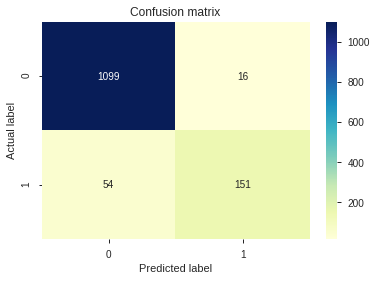

In [0]:
p = sns.heatmap(pd.DataFrame(confusion_matrix(test_y,y_pred)), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

**3)ROC AUC CURVE:-**

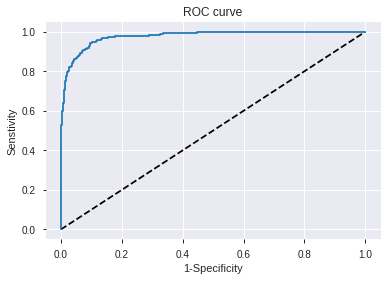

In [0]:
from sklearn.metrics import roc_curve
y_pred_proba = ann.predict_proba(test_X)
fpr, tpr, thresholds = roc_curve(test_y, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('1-Specificity')
plt.ylabel('Senstivity')
plt.title('ROC curve')
plt.show()

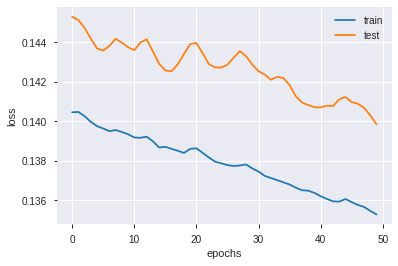

In [221]:
plt.plot(k.history['loss'],label='train')
plt.xlabel('epochs')
plt.plot(k.history['val_loss'],label='test')
plt.ylabel('loss')
plt.legend()

plt.show()

In [0]:
print(k.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


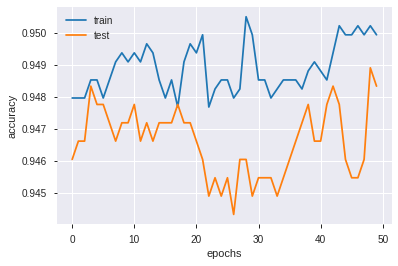

In [222]:
plt.plot(k.history['acc'],label='train')
plt.xlabel('epochs')
plt.plot(k.history['val_acc'],label='test')
plt.ylabel('accuracy')
plt.legend()
plt.show()

it is apparent from the graph that in the last iteration the accuracy of test and train are very close which shows there isnt overfitting and the model is predicting quite good

In [0]:
%cd /content/drive/My Drive/New folder/data science

/content/drive/My Drive/New folder/data science


In [0]:
ann.save('musk_project.h5')

In [0]:
test_predictions=pd.concat({'Actual':test_y.reset_index(drop=True),'Predicted':y_pred},axis=1 )

In [234]:
%pwd

'/content/drive/My Drive/New folder/data science'

In [237]:
test_predictions

Actual  Predicted
0          0          0
1          0          0
2          0          0
3          0          0
4          0          0
...      ...        ...
1315       0          0
1316       1          1
1317       0          0
1318       0          0
1319       0          0

[1320 rows x 2 columns]

In [241]:
%cd /content/drive/My Drive/New folder/data science

/content/drive/My Drive/New folder/data science


In [0]:
from google.colab import files

In [0]:
test_predictions.to_csv('Predictions.csv',index=False)